In [1]:
#As always let's start by the libraries
import deeplenstronomy.deeplenstronomy as dl
from deeplenstronomy.visualize import view_image, view_image_rgb
import numpy as np
import pandas as pd
from scipy import stats as st
from scipy.interpolate import InterpolatedUnivariateSpline as Spline1d
import matplotlib.pyplot as plt
from astropy.io import fits

%matplotlib inline

In [2]:
lens_desc = pd.read_csv('./config/lenses_DESc.txt',
                        sep=" ",
                        header=None,
                        skiprows = 34,
                        names = ["index", "zl", "zs", "thetaE", "sig_v", "ql", "rl","lens_g",
                                 "lens_r", "lens_i", "rl2","xs", "ys", "qs", "ps","rs", "mu_s",
                                 "seein_g", "seein_g_im","seein_r", "seein_r_im","seein_i", "seein_i_im", "g-i"])
lens_desc.head()

,index,zl,zs,thetaE,sig_v,ql,rl,lens_g,lens_r,lens_i,...,ps,rs,mu_s,seein_g,seein_g_im,seein_r,seein_r_im,seein_i,seein_i_im,g-i
0,0,0.320,1.784,1.497,265.112,0.771,1.330,19.961,18.086,17.442,...,131.188,0.290,6.413,1.352,37.000,1.352,19.368,1.352,11.432,32.021
1,1,0.402,1.790,1.372,264.665,0.811,0.819,20.778,18.833,18.103,...,35.232,0.408,4.585,1.352,22.528,1.352,11.003,1.352,9.419,19.750
2,3,0.569,1.285,1.361,318.578,0.671,0.853,21.374,19.530,18.255,...,113.910,0.290,8.931,1.352,32.892,1.352,22.761,1.352,16.575,28.284
3,4,0.189,3.385,1.686,257.082,0.709,2.291,18.166,16.757,16.249,...,125.445,0.321,7.212,1.352,23.054,1.352,15.983,1.352,9.900,17.660
4,5,0.568,1.057,0.658,242.661,0.768,0.409,22.679,20.836,19.562,...,53.932,0.008,156.589,1.352,0.002,1.352,21.890,1.352,25.334,0.000


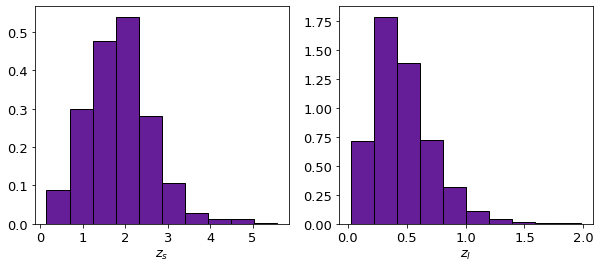

In [3]:
plt.rcParams.update({"font.size": 13})
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].hist(lens_desc['zs'], ec='k', density=True, color='#661D98')
ax[0].set_xlabel('$z_s$')

ax[1].hist(lens_desc['zl'], ec='k', density=True, color='#661D98')
ax[1].set_xlabel('$z_l$');

In [4]:
y, x = np.histogram(lens_desc['zl'][lens_desc['zl']<1.])
print('# of bins:', len(y))

x_new = np.zeros(len(y))
for i in range(0, len(x)-1):
    x_new[i]=(x[i] + x[i + 1])/2.0

# of bins: 10


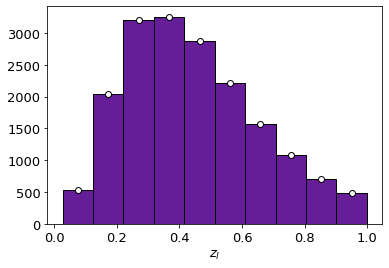

In [5]:
plt.rcParams.update({"font.size": 13})

plt.hist(lens_desc['zl'][lens_desc['zl']<1.], ec='k', color='#661D98');
plt.scatter(x_new, y, c='w', edgecolors='k')
plt.xlabel('$z_l$');

In [6]:
dist_func = Spline1d(x_new, y, k=2)
min_x, max_x = np.min(x_new), np.max(x_new)
x_grid = np.linspace(min_x, max_x, 100)
y_func = dist_func(x_grid)

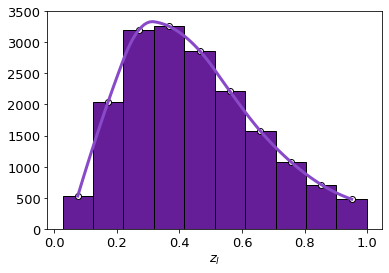

In [7]:
plt.rcParams.update({"font.size": 13})

plt.hist(lens_desc['zl'][lens_desc['zl']<1.], ec='k', color='#661D98');
plt.scatter(x_new, y, c='w', edgecolors='k')
plt.plot(x_grid, y_func, c = '#894AC9', lw=3.)
plt.xlabel('$z_l$');

In [8]:
zl = np.array(lens_desc['zl'][(lens_desc['zl']>min_x) & (lens_desc['zl']<max_x)])
weight = dist_func(zl)

zl_distribution_dataframe = pd.DataFrame(np.array([zl, weight]).T, columns=['PLANE_1-OBJECT_1-REDSHIFT', 'WEIGHT'])
zl_distribution_dataframe.head()

,PLANE_1-OBJECT_1-REDSHIFT,WEIGHT
0,0.320,3330.692359
1,0.402,3153.859009
2,0.569,2159.591399
3,0.189,2277.058819
4,0.568,2166.522669


In [9]:
zl_distribution_dataframe.to_csv('./config/lens_redshifts.txt', index=False, sep=' ')

In [10]:
mag_g = np.array(lens_desc['lens_g'][(lens_desc['zl']>min_x) & (lens_desc['zl']<max_x)])
mag_r = np.array(lens_desc['lens_r'][(lens_desc['zl']>min_x) & (lens_desc['zl']<max_x)])
mag_i = np.array(lens_desc['lens_i'][(lens_desc['zl']>min_x) & (lens_desc['zl']<max_x)])

In [11]:
mag_distribution_dataframe = pd.DataFrame(np.array([zl, mag_g, mag_r, mag_i, weight]).T, columns=['CONFIGURATION_1-PLANE_1-OBJECT_1-REDSHIFT', 'CONFIGURATION_1-PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-g', 'CONFIGURATION_1-PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-r', 'CONFIGURATION_1-PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-i', 'WEIGHT'])
mag_distribution_dataframe.head()

,CONFIGURATION_1-PLANE_1-OBJECT_1-REDSHIFT,CONFIGURATION_1-PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-g,CONFIGURATION_1-PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-r,CONFIGURATION_1-PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-i,WEIGHT
0,0.320,19.961,18.086,17.442,3330.692359
1,0.402,20.778,18.833,18.103,3153.859009
2,0.569,21.374,19.530,18.255,2159.591399
3,0.189,18.166,16.757,16.249,2277.058819
4,0.568,22.679,20.836,19.562,2166.522669


In [12]:
mag_distribution_dataframe.to_csv('./config/mags_lens.txt', index=False, sep=' ')

In [13]:
deeplens = dl.make_dataset('./config/configuration_file.yaml', survey='des', verbose=True)

Entering main organization loop
Organizing CONFIGURATION_1
Generating images for CONFIGURATION_1
	Progress: 100.0 %  ---  Elapsed Time: 0 H 9 M 0 S         


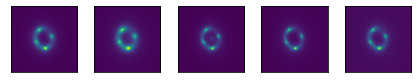

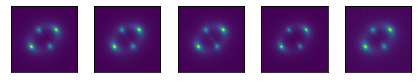

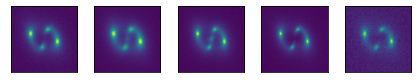

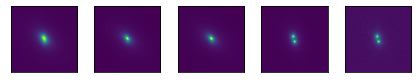

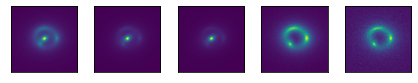

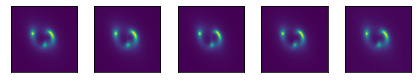

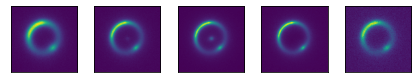

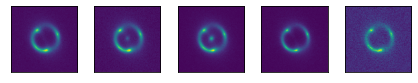

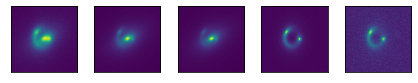

In [14]:
for i in range(9):
    view_image(deeplens.CONFIGURATION_1_images[i])

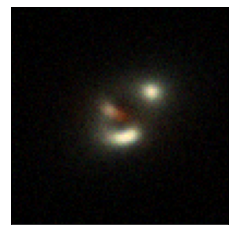

In [15]:
view_image_rgb(deeplens.CONFIGURATION_1_images[9])

In [16]:
deeplens.CONFIGURATION_1_metadata.to_csv('./fits_files/metadata.txt', index=False)

In [17]:
#set(deeplens.CONFIGURATION_1_metadata.columns)

In [18]:
fits_path = ['g', 'r', 'i', 'z', 'Y']

for i in range(0, len(deeplens.CONFIGURATION_1_images)):
    for j in range(0, len(deeplens.CONFIGURATION_1_images[i])):
        hdu = fits.PrimaryHDU(data=deeplens.CONFIGURATION_1_images[i][j])
        hdu.writeto('./fits_files/'+fits_path[j]+'/'+str(i)+'.fits')